<h1>Data Strunctures Assignment 1</h1>

<p>Execute the cells sequentially to ensure integrity of test results.</p>
<p>This notebbok needs to be run in a python environment with matplotlib installed for the graphs to be rendered.</p>
<p>Running all cells together takes less than 1 minute on our average-performance machine. It should complete under 1 minute on yours too. </p>

In [1]:
# we're gonna need timing, graphing and random number generation utilities.
from matplotlib import pyplot as plt
from time import time
from random import randint

<h1>Part 1: computing running time in seconds</h1>

<h2>Merge sort</h2>

<p>A MergeSortTimer object performs merge sort on lists and records the size of the lists along with the time it took to sort them. This data will be used later to plot graphs.</p>

In [2]:
class MergeSortTimer:
    """A MergeSortTimer object performs merge sort on lists and records the size of 
    the lists along with the time it took to sort them. This data will be used later 
    to plot graphs"""

    def __init__(self):
        self.inputSize = []
        self.execTime = []

    def _merge(self, l1, l2):
        ind1 = 0
        ind2 = 0
        merged = []
        while ind1 < len(l1) and ind2 < len(l2):
            if l1[ind1] <= l2[ind2]:
                merged.append(l1[ind1])
                ind1 += 1
            else:
                merged.append(l2[ind2])
                ind2 += 1
        if ind1 == len(l1):
            while ind2 < len(l2):
                merged.append(l2[ind2])
                ind2 += 1
        else:
            while ind1 < len(l1):
                merged.append(l1[ind1])
                ind1 += 1
        return merged

    def _merge_sort(self, l):
        if len(l) < 2:
            return l
        else:
            return self._merge(self._merge_sort(l[:len(l)//2]), self._merge_sort(l[len(l)//2:]))

    def mergeSort(self, l):
        """perform merge sort and record the list size with the time taken to sort it."""
        self.inputSize.append(len(l))
        startTime = time()
        result = self._merge_sort(l)
        self.execTime.append(time()-startTime)
        return result



<h5>Merge sort on unsorted lists</h5>

In [6]:
# we're sorting 50 randomly generated lists of different sizes and recording the 
# data (each size and time taken for each sort)
mst = MergeSortTimer()
for i in range(50):
    mst.mergeSort([randint(0,500) for _ in range(i*100)])

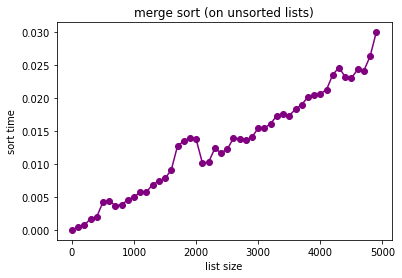

In [7]:
# displaying how the time scales with inclreasing input size
plt.title("merge sort (on unsorted lists)")
plt.xlabel("list size")
plt.ylabel("sort time")
plt.plot(mst.inputSize, mst.execTime, marker="o", color="purple")

<h5>Merge sort on already sorted lists</h5>

In [8]:
# we're doing merge sort on 50 different lists of different size but all are already
# sorted in ascending order.
mst = MergeSortTimer()
for i in range(50):
    mst.mergeSort([j for j in range(i*100)])

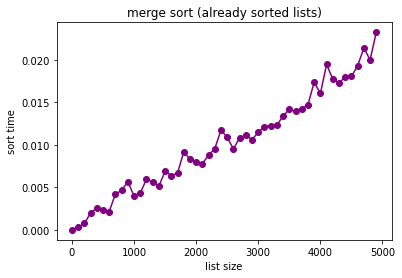

In [9]:
plt.title("merge sort (already sorted lists)")
plt.xlabel("list size")
plt.ylabel("sort time")
plt.plot(mst.inputSize, mst.execTime, marker="o", color="purple")

<h5>Merge sort on reverse sorted (descending) lists</h5>

In [10]:
# we're doing merge sort on 50 different lists of different size but all are sorted
# in reverse order. (the worst input for the algorithm)
mst = MergeSortTimer()
for i in range(50):
    mst.mergeSort([j for j in reversed((range(i*100)))])

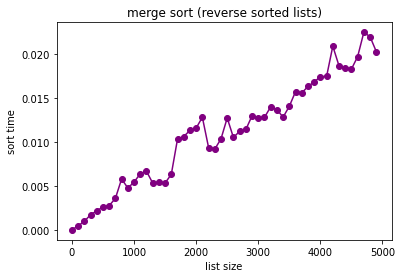

In [11]:
plt.title("merge sort (reverse sorted lists)")
plt.xlabel("list size")
plt.ylabel("sort time")
plt.plot(mst.inputSize, mst.execTime, marker="o", color="purple")

<h3>Interpretation</h3>

<p>CPU time is always tricky to interpret. But we can use it naively to measure the performance of algoritms. In the above figure, the plot of list size against time taken to merge sort the list suggests a nearly linear relationship. (ignoring extreme points). We know that merge sort has O(nlogn) running time. Graphs of nlogn are really similar to linear graphs and it might be impossible to distinguish between the two if we're using CPU time to measure performance. That's the case with the above plots.</p>

<p>The last two graphs represent the condition when the merge sort algorithm is given lists that are already sorted (the second graph) and lists that are sorted in reverse order (third graph). If we look at the implementation of the algorithm, we see that the split and merge steps are performed for all divisions of the list regardless of whether the list is sorted or not. This gives the algorithm O(nlogn) running time on all possible input lists. If we see marked difference between the above three graphs. It's merely because of fluctuations in CPU usage of the computer. This will become clearer later when we use opertation counts to measure performance of the algorithms.</p>

<h2>Quick sort</h2>

<p>A QuickSortTimer object performs quick sort on lists of different sizes and, along the way, records the length of each list with the associated time taken to sort the list.</p>

In [13]:
class QuickSortTimer:
    def __init__(self):
        self.inputSize = []
        self.execTime = []

    def _quick_sort(self, lis):
        if len(lis) < 2:
            return lis
        pivot = lis[-1]
        left = []
        right = []
        for i in range(len(lis)-1):
            if lis[i] <= pivot: left.append(lis[i])
            else: right.append(lis[i])
        return self._quick_sort(left) + [pivot] + self._quick_sort(right)

    def quickSort(self, lis):
        self.inputSize.append(len(lis))
        startTime = time()
        result = self._quick_sort(lis)
        self.execTime.append(time()-startTime)
        return result

<h5>Quick sort on unsorted lists</h5>

In [19]:
# we're sorting 100 different lists of different sizes and recording the list size along
# with the time taken to quick sort the list
qst = QuickSortTimer()
for i in range(100):
    qst.quickSort([randint(0,500) for _ in range(i*100)])

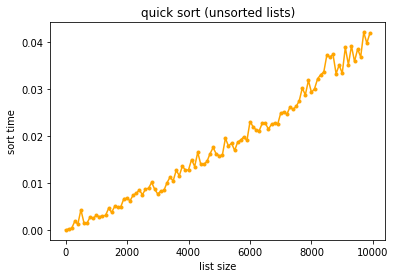

In [18]:
# displaying how the quicksort time scales with inclreasing list size.
plt.title("quick sort (unsorted lists)")
plt.xlabel("list size")
plt.ylabel("sort time")
plt.plot(qst.inputSize, qst.execTime, marker=".", color="orange")

<h5>Quick sort on already sorted lists</h5>

In [22]:
# we're doing merge sort on 50 different lists of different size but all are already
# sorted in ascending order.
qst = QuickSortTimer()
for i in range(40):
    qst.quickSort([j for j in range(i*50)])

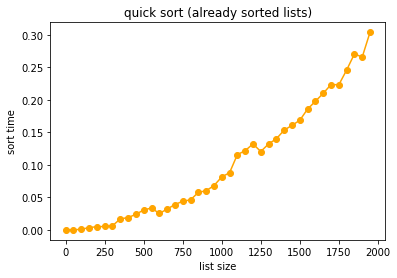

In [23]:
plt.title("quick sort (already sorted lists)")
plt.xlabel("list size")
plt.ylabel("sort time")
plt.plot(qst.inputSize, qst.execTime, marker="o", color="orange")

<h5>Quick sort on reverse sorted lists</h5>

In [28]:
# we're doing quick sort on 50 different lists of different size but all are sorted
# in reverse order. (the worst input for the algorithm)
qst = QuickSortTimer()
for i in range(40):
    qst.quickSort([j for j in reversed((range(i*50)))])

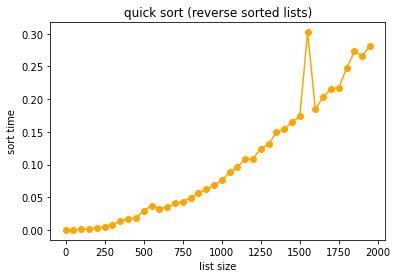

In [29]:
plt.title("quick sort (reverse sorted lists)")
plt.xlabel("list size")
plt.ylabel("sort time")
plt.plot(qst.inputSize, qst.execTime, marker="o", color="orange")

<h3>Interpretation</h3>

<p>Again, using CPU time is a ticky business. We try to ignore extreme points to make the analysis sound.</p>

<p>The first of these three graphs show how CPU time scales with increasing size of lists for quick sort. These lists are unordered in the first place. The graph suggests a nearly linear relationship but we know quicksort has O(nlogn) average case time complexity. Unfortunately, with the fluctuation of CPU time, it might be difficult to distinguish between linear and nlogn graphs on this plot.<p>

<p>The last two graphs show the result of doing quick sort on lists that are already sorted in ascending order (second graph) and descending order (third graph). In both cases, the graphs indicate a quadratic relationship. This has to do with how we chose the pivot while implementing the algorithm. Our quicksort algorithm selects whatever is at the end of the list as the pivot. This results in the extreme elements being selected at each step if the list is already sorted in either order. This is the worst case for quicksort where it performs in O(n^2) time complexity, thus the quadratic nature of the last two graphs</p>

<h2>Insertion sort</h2>

<p>An InsertionSortTimer object performs insertion sort on lists of differnet sizes and records the size of the list along with the time it took to insertion sort the list. This data will later be user for visualizations</p>

In [30]:
class InsertionSortTimer:
    def __init__(self):
        self.inputSize = []
        self.execTime = []

    def insertionSort(self, l):
        self.inputSize.append(len(l))
        startTime = time()
        for i in range(1, len(l)):
            j = i
            while(l[j] < l[j-1] and j > 0):
                l[j], l[j-1] = l[j-1], l[j]
                j -= 1
        self.execTime.append(time()-startTime)
        return l


<h5>Insertion sort on unsorted lists</h5>

In [31]:
# sorting 40 different lists of different sizes with insertion sort
ist = InsertionSortTimer()
for i in range(40):
    ist.insertionSort([randint(0,500) for _ in range(i*50)])

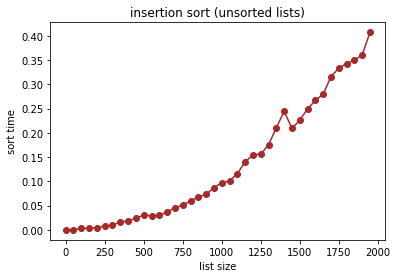

In [32]:
# displaying how the insertion sort time scales with increasing list lise.
plt.title("insertion sort (unsorted lists)")
plt.xlabel("list size")
plt.ylabel("sort time")
plt.plot(ist.inputSize, ist.execTime, marker="o", color="brown")

<h5>Insertion sort on already sorted lists</h5>

In [36]:
# we're doing insertion sort on already sorted lists of various sizes
ist = InsertionSortTimer()
for i in range(50):
    ist.insertionSort([j for j in range(i*100)])

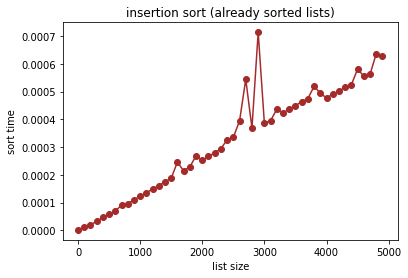

In [37]:
# displaying the result ... 
plt.title("insertion sort (already sorted lists)")
plt.xlabel("list size")
plt.ylabel("sort time")
plt.plot(ist.inputSize, ist.execTime, marker="o", color="brown")

<h5>Insertion sort on reverse sorted (descending) lists</h5>

In [38]:
# we're doing insertion sort on reverse sorted arrays of various length
ist = InsertionSortTimer()
for i in range(40):
    ist.insertionSort([j for j in reversed((range(i*50)))])

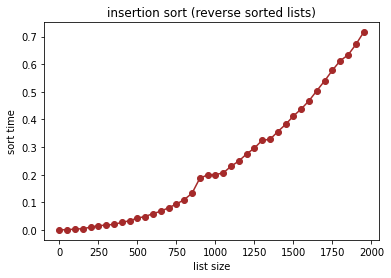

In [39]:
# displaying the result ... 
plt.title("insertion sort (reverse sorted lists)")
plt.xlabel("list size")
plt.ylabel("sort time")
plt.plot(ist.inputSize, ist.execTime, marker="o", color="brown")

<h5>Interpretation</h5>

<p>The above three graphs (ignoring extreme points) represent how the runtime of insertion sort scales with increasing size of the lists when the lists are unsorted, already sorted, and reverse sorted, respectively. Insertion sort famously has O(n^2) average case and worst case time complexities. But the 2nd graph deserves special attention because it indicates a linear scale. Indeed, by looking at the implementation of the insertion sort algortinm, we can conclude that if the list is already sorted in ascending order, there will be no operations to move elements of the list. The insertion sort algorithm in this case only traverses the list once in O(n) at each iteration reverting from moving anything becuase the list is already sorted. Thus the linear pattern on the second graph</p>

<h2>Part 2: Counting the number of operations</h2>

<h2>Merge sort</h2>

<p>A MergeSortCounter object performs merge sort on lists of different sizes and, along the way, records the number of operations performed during the sort of a list together with the length of the list. This data will later be used to plot graphs.</p>

In [40]:
class MergeSortCounter:
    def __init__(self):
        self.counter = 0
        self.inputSize = []
        self.operations = []

    def resetCounter(self):
        self.counter = 0

    def _merge(self, l1, l2,):
        ind1 = 0
        ind2 = 0
        merged = []
        while ind1 < len(l1) and ind2 < len(l2):
            if l1[ind1] <= l2[ind2]:
                merged.append(l1[ind1])
                ind1 += 1
            else:
                merged.append(l2[ind2])
                ind2 += 1
            self.counter += 1
        if ind1 == len(l1):
            while ind2 < len(l2):
                merged.append(l2[ind2])
                ind2 += 1
                self.counter += 1
        else:
            while ind1 < len(l1):
                merged.append(l1[ind1])
                ind1 += 1
                self.counter += 1
        return merged

    def _merge_sort(self, l):
        if len(l) < 2:
            return l
        else:
            return self._merge(self._merge_sort(l[:len(l)//2]), self._merge_sort(l[len(l)//2:]))

    def mergeSort(self, l):
        self.inputSize.append(len(l))
        result = self._merge_sort(l)
        self.operations.append(self.counter)
        self.resetCounter()
        return result

<h5>Merge sort on unsorted lists</h5>

In [41]:
# we're doing merge sort on 30 different lists of increasing size
msc = MergeSortCounter()
for i in range(30):
    msc.mergeSort([randint(0,500) for _ in range(i*100)])

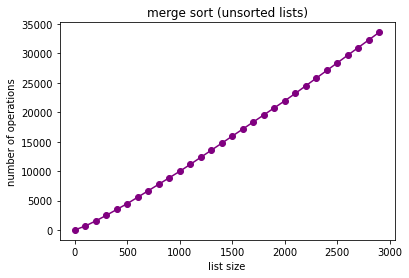

In [42]:
# displaying  the result
plt.title("merge sort (unsorted lists)")
plt.xlabel("list size")
plt.ylabel("number of operations")
plt.plot(msc.inputSize, msc.operations, marker="o", color="purple")

<h5>Merge sort on already sorted lists</h5>

In [43]:
# we're doing merge sort on 30 different lists of different size but all are already
# sorted in ascending order.
msc = MergeSortCounter()
for i in range(30):
    msc.mergeSort([j for j in range(i*100)])

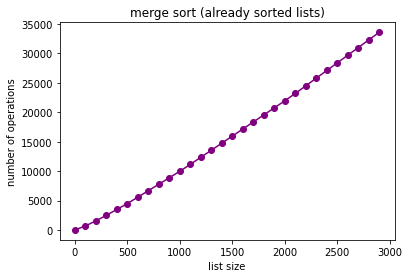

In [44]:
# displaying how the number of operations scales with inclreading input size
plt.title("merge sort (already sorted lists)")
plt.xlabel("list size")
plt.ylabel("number of operations")
plt.plot(msc.inputSize, msc.operations, marker="o", color="purple")

<h5>Merge sort on reverse sorted lists</h5>

In [45]:
# we're doing merge sort on 30 different lists of different sizes but all are
# sorted in reverse order.
msc = MergeSortCounter()
for i in range(30):
    msc.mergeSort([j for j in reversed(range(i*100))])

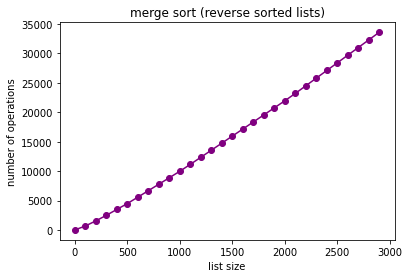

In [46]:
# displaying how the number of operations scales with inclreading input size
plt.title("merge sort (reverse sorted lists)")
plt.xlabel("list size")
plt.ylabel("number of operations")
plt.plot(msc.inputSize, msc.operations, marker="o", color="purple")

<h3>Interpretation</h5>

<p>Now we're counting number of operations (instead of timing the execution) so our results are more representative of the performance of the algorithm. The above three graps represent the performance of our merge sort algorithm on unsorted lists, already sorted lists, and reverse sorted lists, respectively. As can be seen, the three graphs are absolutely identical. At first glace, they seems like a linear graph but if we look really closely around the start of the axes, we can recognize that they're graphs of the nlogn function. The similarity of the graphs confirms our understanding of merge sort that each split and merge process takes place regardless of weather the list chunks are sorted in any order or not.</p>

<h2>Quick sort</h2>

<p>A QuickSortCounter object performs quick sort on lists of different sizes and, along the way, stores the size of each list together with the number of operations performed to quick sort it.</p>

In [47]:
class QuickSortCounter:
    def __init__(self):
        self.counter = 0
        self.inputSize = []
        self.operations = []

    def resetCounter(self):
        self.counter = 0

    def _quick_sort(self, lis):
        if len(lis) < 2:
            self.counter += 1
            return lis
        pivot = lis[-1]
        left = []
        right = []
        for i in range(len(lis)-1):
            if lis[i] <= pivot: left.append(lis[i])
            else: right.append(lis[i])
            self.counter += 1
        return self._quick_sort(left) + [pivot,] + self._quick_sort(right)

    def quickSort(self, lis):
        self.inputSize.append(len(lis))
        result = self._quick_sort(lis)
        self.operations.append(self.counter)
        self.resetCounter()
        return result
    

<h5>Quick sort on unsorted lists</h5>

In [48]:
# we're doing quick sort on 40 different lists of increasing size
qsc = QuickSortCounter()
for i in range(40):
    qsc.quickSort([randint(0,500) for _ in range(i*100)])

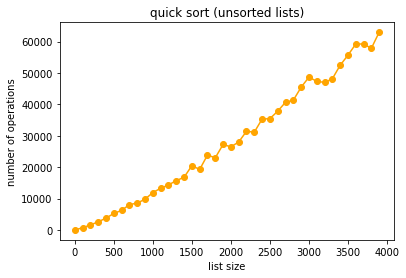

In [49]:
# dislplaying the results
plt.title("quick sort (unsorted lists)")
plt.xlabel("list size")
plt.ylabel("number of operations")
plt.plot(qsc.inputSize, qsc.operations, marker="o", color="orange")

<h5>quick sort on already sorted lists</h5>

In [50]:
# we're doing quick sort on 40 different lists of increasing size each already soted
qsc = QuickSortCounter()
for i in range(30):
    qsc.quickSort([j for j in range(i*50)])

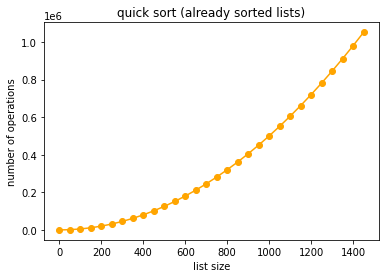

In [51]:
# dislplaying the results
plt.title("quick sort (already sorted lists)")
plt.xlabel("list size")
plt.ylabel("number of operations")
plt.plot(qsc.inputSize, qsc.operations, marker="o", color="orange")

<h5>quick sort on reverse sorted lists</h5>

In [52]:
# we're doing quick sort on 40 different lists of increasing size each
# sorted in reverse order
qsc = QuickSortCounter()
for i in range(30):
    qsc.quickSort([j for j in reversed(range(i*50))])

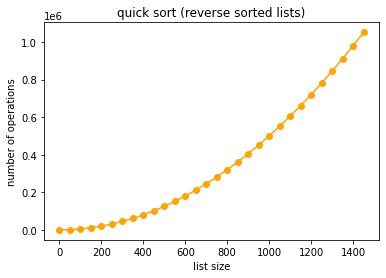

In [53]:
# dislplaying the results
plt.title("quick sort (reverse sorted lists)")
plt.xlabel("list size")
plt.ylabel("number of operations")
plt.plot(qsc.inputSize, qsc.operations, marker="o", color="orange")

<h3>Interpretation</h3>

<p>The above three graphs show performance of the quick sort algorithm on unsorted, already sorted, and reverse sorted lists. Looking at the first graph, it resembles a linear kind of scale which actually is a graph of the nlogn function. It's really difficult to distinguish between the two especially when the graph has irregularities. The irregularities are introduced because of the choice of pivot elements at each step. The closer the pivot is to the median of the elements, the better the performance.</p>

<p>The last two graphs show the the case when the input lists are ordered ascending and in reverse. They look identical to the quadratic graph. This is expected behavior because our implementation of the quicksort algorithm always takes the pivot from the end of the list. So in these two cases, each pivot will be the least or the highest element of a chunk of the list. In each recursion of the algorithm, the input list will decrease only by one element. This results in O(n^2) running time complexity.</p>

<h2>Insertion sort</h2>

<p>An InsertionSortCounter object performs insertion sort on different lists and stores the length of the list along with the number of operations performed during the sort</p>

In [54]:
class InsertionSortCounter:
    def __init__(self):
        self.counter = 0
        self.inputSize = []
        self.operations = []

    def resetCounter(self):
        self.counter = 0

    def insertionSort(self, lis):
        self.inputSize.append(len(lis))
        for i in range(1, len(lis)):
            j = i
            self.counter += 1
            while(lis[j] < lis[j-1] and j > 0):
                lis[j], lis[j-1] = lis[j-1], lis[j]
                self.counter += 1
                j -= 1
        self.operations.append(self.counter)
        self.resetCounter()
        return lis
    

<h5>insertion sort on unsorted lists</h5>

In [55]:
# performing quicksort on 30 differnt lists oc increasing size and recording the data
isc = InsertionSortCounter()
for i in range(30):
    isc.insertionSort([randint(0, 500) for _ in range(i*50)])

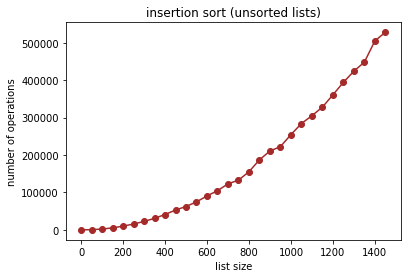

In [56]:
# displaying how the number of operations scale with the list size for insertion sort
plt.title("insertion sort (unsorted lists)")
plt.xlabel("list size")
plt.ylabel("number of operations")
plt.plot(isc.inputSize, isc.operations, marker="o", color="brown")

<h5>insertion sort on already sorted lists</h5>

In [57]:
# performing quicksort on 30 differnt lists of increasing size which 
# are all already sorted
isc = InsertionSortCounter()
for i in range(30):
    isc.insertionSort([j for j in range(i*50)])

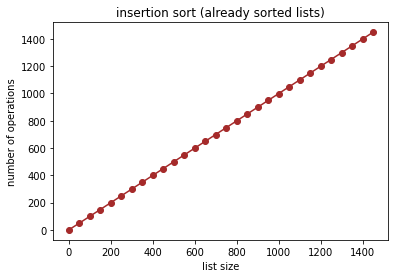

In [58]:
# displaying how the number of operations scale with the list size
plt.title("insertion sort (already sorted lists)")
plt.xlabel("list size")
plt.ylabel("number of operations")
plt.plot(isc.inputSize, isc.operations, marker="o", color="brown")

<h5>insertion sort on reverse sorted lists</h5>

In [59]:
# performing quicksort on 30 differnt lists of increasing size which 
# are all reverse sorted
isc = InsertionSortCounter()
for i in range(30):
    isc.insertionSort([j for j in reversed(range(i*50))])

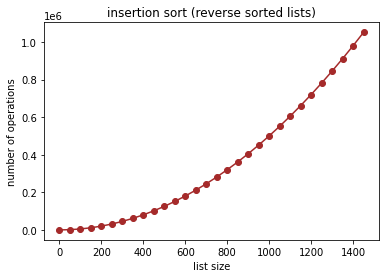

In [60]:
# displaying how the number of operations scale with the list size
plt.title("insertion sort (reverse sorted lists)")
plt.xlabel("list size")
plt.ylabel("number of operations")
plt.plot(isc.inputSize, isc.operations, marker="o", color="brown")

<h3>Interpretation</h5>

<p>The above three graphs represent the performance of the insertions sort algorithm for unsorted lists, already sorted lists, and reverse sorted lists, respectively.</p>

<p>The first graph clearly shows that the insertion sort algorithm has O(n^2) average case runtime complexity. This confirms our understanding of the algorithm from its implementation.</p>

<p>The second graph is interesting in that it depicts a linear relationship and not a quadratic one. This is because when the algorithm runs on an already sorted list, it can finish with one traversal on the list, at each step without moving any element because the list is already sorted.</p>

<p>The third graph is similar to the first one in that it shows a quadratic pattern. One diference between the two is the fact that the latter is significantly steeper than the former. we can confirm this by looking at the y-axis of the two graphs. This is a result of different constatnt multiplications on the O(n^2) complexity.</p> 